# Homework set 5

Before you turn this problem in, make sure everything runs as expected (in the menubar, select Kernel → Restart Kernel and Run All Cells...).

Please **submit this Jupyter notebook through Canvas** no later than **Mon Dec. 4, 9:00**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. A pdf version can be made using the save and export option in the Jupyter Lab file menu.**

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Loes Bijman 15211312

Sacha Gijsbers 12798525

# Exercise 1 (6 points)

A bacterial population $P$ grows according to the geometric progression

$$P_t = rP_{t-1}$$

Where r is the growth rate. The following population counts $P_1 ,\ldots, P_8$ (in billions) are observed:

In [1]:
import numpy as np

data = np.array( [0.19, 0.36, 0.69, 1.3, 2.5, 4.7, 8.5, 14] )

# (a)
Read chapter 6.6 on Nonlinear Least squares. Use the Gauss-Newton Method to fit the model function $f(t, x_1, x_2) = x_1\!\cdot x_2^t$ to the data. Find estimates for the initial population $P_0=x_1$ and the growth rate $r=x_2$. Implement the Gauss-Newton method yourself. You may use linear algebra functions from `scipy` and `numpy`. Plot the datapoints and the curve fitted to the data in a semilogarithmic plot.

It is best if you define your function for Gauss-Newton separately from the definitions associated with the bacterial model.

In [196]:
# define Gauss-Newton here

def fit_function(t, x0):
    '''function used to fit to the data'''
    return x0[0] * x0[1]**t

def dfdx1(t_data,x0):
    '''partial derivative over x1'''
    return -x0[1]**t_data

def dfdx2(t_data,x0):
    '''partial derivative over x2'''
    return -t_data * x0[0] * x0[1]**(t_data-1)

def Jacobian(t_data,x0):
    '''returns the Jacobian matrix given the partial derivatives over x1 and x2'''
    return np.column_stack((dfdx1(t_data,x0),dfdx2(t_data,x0)))

def residual(t_data,y_data,function,x0):
    return y_data - function(t_data, x0)

def Gauss_Newton(t_data,y_data,function,x0,max_iterations,residual_function = residual):
    x = x0
    for _ in range(max_iterations):
        s = np.linalg.lstsq(Jacobian(t_data,x),-residual_function(t_data,y_data,function,x), rcond=None)[0]
        x += s
    return x

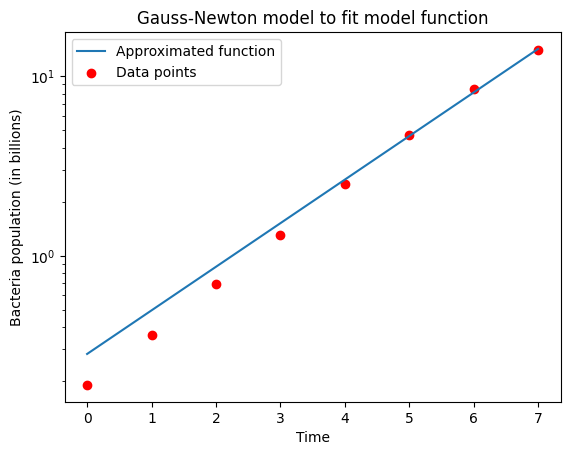

In [197]:
import matplotlib.pyplot as plt

# make definitions for bacterial model and run Gauss-Newton here
t_data = np.array([0.0, 1, 2, 3, 4, 5, 6, 7])

x0 = [1,1]
max_iterations = 10

x_gauss = Gauss_Newton(t_data, data, fit_function, x0, max_iterations)

plt.plot(fit_function(t_data, x_gauss), label = 'Approximated function')
plt.scatter(t_data, data, color = 'red', label = 'Data points')
plt.yscale('log')
plt.title('Gauss-Newton model to fit model function')
plt.ylabel('Bacteria population (in billions)')
plt.xlabel('Time')
plt.legend()
plt.show()

# (b)
Let $f$ be a vector valued function $f = [ f_1, \ldots, f_m ]^T$. In weighted least squares one aims to minimize the objective function
$$
  \phi(x) = \frac{1}{2} \sum_{i=1}^m W_{ii} ( y_i - f_i(x)) ^2 , \qquad
  W_{ii} = \frac{1}{\sigma_i^2} , 
$$
where $\sigma_i$ is an estimate of the standard deviation in the data point $y_i$. This is equivalent to the standard least squares problem 
$$
\min_x \frac{1}{2} \| Y - F(x) \|_2^2
$$
with $F_i(x) = \frac{1}{\sigma_i} f(x)$  , $Y_i = \frac{1}{\sigma_i} y_i$. Assume that for each data point $y_i$ in the list above, the estimate for the standard deviation is given by
$$
  \sigma_i = 0.05 y_i .
$$ 
Perform a weighted least squares fit to obtain estimates for $P_0$ and $r$. 

Plot the datapoints and the curve fitted to the data again in a semilogarithmic plot.

Compare the residuals, i.e. the values of $y_i - f_i(x)$) obtained in (a) and (b), and discuss the differences between the results of the weighted and the unweighted optimization.


In [205]:
import scipy

def weighted_residual1(t_data, y_data, fit_function,x):
    weight_sum = 0
    for i, y in enumerate(y_data):
        sigma = 0.05*y 
        W = 1/(sigma**2)

        weight_sum += W*(y - fit_function(t_data[i],x))**2

    return 0.5*weight_sum

def weighted_residual(t_data, y_data, fit_function,x):
    m = len(y_data)
    residuals = np.empty(m)
    for i in range(m):
        sigma = 0.05 * y_data[i] 
        W = 1/(sigma**2)

        residuals[i] = 0.5 * W * (y_data[i] - fit_function(t_data[i], x)) ** 2
    
    return residuals

x_weight = Gauss_Newton(t_data, data, fit_function, x0, max_iterations, residual_function = weighted_residual)
# x_weight = scipy.optimize.minimize(weighted_residual, x0, args = (fit_function, t_data, data)).x

plt.plot(fit_function(t_data, x_weight), label = 'Approximated function')
plt.scatter(t_data, data, color = 'red', label = 'Data points')
plt.yscale('log')
plt.title('Gauss-Newton model to fit model function')
plt.ylabel('Bacteria population (in billions)')
plt.xlabel('Time')
plt.legend()
plt.show()

C:\Users\sacha\AppData\Local\Temp\ipykernel_23512\2843260552.py:20: RuntimeWarning: overflow encountered in scalar power
  residuals[i] = 0.5 * W * (y_data[i] - fit_function(t_data[i], x)) ** 2


LinAlgError: SVD did not converge in Linear Least Squares

In [167]:
x_gauss = Gauss_Newton(t_data, data, fit_function, x0, max_iterations)
x_weight = scipy.optimize.minimize(weight_function, x0, args = (fit_function, t_data, data)).x

res_gauss = np.sum(abs(residual(t_data,y_data,fit_function,x_gauss)))
res_weight = np.sum(abs(residual(t_data,y_data,fit_function,x_weight)))

print(res_gauss)
print(res_weight)

norm_gauss = np.linalg.norm(residual(t_data,y_data,fit_function,x_gauss))**2
norm_weight = np.linalg.norm(residual(t_data,y_data,fit_function,x_weight))**2

print(norm_gauss)
print(norm_weight)

relative_res_gauss = norm_gauss/(np.linalg.norm(Jacobian(t_data,x0))*np.linalg.norm(-residual(t_data,y_data,fit_function,x0)))
print(relative_res_gauss)

33.44115169664607
33.99422017051482
300.0165470001879
331.6767839267541
9.881970677895055


# Exercise 2 (3 points)
A triangle has been measured. The measurements, a vector $x \in \mathbb{R}^6$, are as follows:
$$\begin{array}{c|c|c|c|c|c}
x_1 = \alpha 
& x_2 = \beta
& x_3 = \gamma
& x_4 = a
& x_5 = b
& x_6 = c \\ \hline
67.5^{\large\circ}
& 52^{\large\circ}
& 60^{\large\circ}
& 172 \text{m}
& 146 \text{m}
& 165 \text{m}
\end{array} .
$$
Here $\alpha, \beta, \gamma$ are the angles opposite the sides with length $a$, $b$, $c$, respectively.
The measurements $x$ have errors. We would like to correct them so that the new values $\tilde{x} = x + h$ are consistent quantities of a triangle. The have to satisfy:
$$ \tag{*}
\begin{array}{ccc}
\text{Sum of angles:} 
& \;\;\;\;\; & 
\tilde{x}_1 + \tilde{x}_2 + \tilde{x}_3 = 180^{\large\circ}
\\
\text{Sine theorem:}
&&
\tilde{x}_4 \sin(\tilde{x}_2) - \tilde{x}_5 \sin(\tilde{x}_1) = 0
\\
&&
\tilde{x}_5 \sin(\tilde{x}_3) - \tilde{x}_6 \sin(\tilde{x}_2) = 0 .
\end{array}$$


## (a)
Solve the constrained least squares problem $\min_x \| h \|_2^2$ subject to the constraints given by (*).

Use `scipy.optimize.minimize`.

Hint: Don't forget to work in radians!

Check that for the new values also e.g. the cosine theorem $c^2 = a^2 + b^2 - 2 ab \cos(\gamma)$ holds.

In [213]:
import math

x = [math.radians(67.5), math.radians(52), math.radians(60), 172, 146, 165]

fun = lambda h: np.linalg.norm(h)**2

constraints = ({'type': 'eq', 'fun': lambda h: x[0]+ h[0] + x[1] + h[1] + x[2] + h[2] - math.radians(180)}, 
                {'type': 'eq', 'fun': lambda h: (x[3] + h[3]) *np.sin(x[1] + h[1]) - (x[4] + h[4])*np.sin(x[0] + h[0])}, 
                {'type': 'eq', 'fun': lambda h: (x[4] + h[4]) * np.sin(x[2] + h[2]) - (x[5] + h[5]) * np.sin(x[1] + h[1])})

initial_guess = np.zeros(6)
h = scipy.optimize.minimize(fun, initial_guess,constraints=constraints).x

x_new = x + h

cos_theorem_old = -x[5]**2 + x[3]**2 + x[4]**2 - 2*x[3]*x[4]*np.cos(x[2])
cos_theorem = -x_new[5]**2 + x_new[3]**2 + x_new[4]**2 - 2*x_new[3]*x_new[4]*np.cos(x_new[2])
print(f'The cosine theorem for the original x values gives {cos_theorem_old}')
print(f'The cosine theorem for the adjusted x values gives {cos_theorem}, which is close to zero')

x_dif = x_new - x
print(f'The difference between the old and new x values {x_dif},\nindicating that the angles are adjusted more the the lengths of the sides')

x_new[0] = math.degrees(x_new[0])
x_new[1] = math.degrees(x_new[1])
x_new[2] = math.degrees(x_new[2])
print(f'The new x value modified by h is {x_new}')

The cosine theorem for the original x values gives -1437.0000000000073
The cosine theorem for the adjusted x values gives -1.2376403901726007e-08, which is close to zero
The difference between the old and new x values [-0.01169255 -0.01231171  0.0327309   0.0002013   0.00012197 -0.00032557],
indicating that the angles are adjusted more the the lengths of the sides
The new x value modified by h is [ 66.83006608  51.29459126  61.87534266 172.0002013  146.00012197
 164.99967443]


## (b)
You will notice that the corrections will be made mainly to the angles and much less to the lengths of the sides of the triangle. This is because the measurements have not the same absolute errors. While the error in last digit of the sides is about 1, the errors in radians of the angles are about 0.01. Repeat your computation by taking in account with appropriate weighting the difference in measurement errors. Minimize not simply $\| h \|_2^2$ but
$$
  \left\| \begin{bmatrix} 100 h_1 \\ 100 h_2 \\ 100 h_3 \\ h_4 \\ h_5 \\ h_6 \end{bmatrix} \right\|_2^2.$$